In [1]:
# Import dependencies
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
from datetime import timedelta

In [2]:
# Import API Key 
from config import key

In [3]:
# Make a request to the worldweatheronline local history weather API page
def makeARequest(location, startDate, endDate, yourAPIKey):
    baseURL = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    timeInterval = "1" # time intervals for every hour
    outputFormatToReturn = "json"

    requestURL = f"{baseURL}?q={location}&date={startDate}&enddate={endDate}&tp={timeInterval}&format={outputFormatToReturn}&key={yourAPIKey}"
    
    response = requests.get(requestURL)

# If response code says succeeded, then get the json. if not, return error code.  
    if response.status_code == 200:
        responseJson = response.json()
        return responseJson
    else:
        return print(response.status_code)

In [4]:
# Pull the wind variables from the responseJson 
# For loop getting hourly weather data for each day in the month
def monthlyHistoricalWeather(firstDayOfMonth, lastDayOfMonth, jsonResponse):
    
    first = datetime.strptime(firstDayOfMonth, '%Y-%m-%d')
    last = datetime.strptime(lastDayOfMonth, '%Y-%m-%d')
    numberOfDays = last.day - first.day

    HourlyHistoricalWeather = []
    
    for day in np.arange(0,numberOfDays + 1,1):
        for hour in np.arange(0,24,1):
            HourlyHistoricalWeather.append({
                "Date" : jsonResponse["data"]["weather"][day]["date"],
                "Time" : jsonResponse["data"]["weather"][day]["hourly"][hour]["time"],
                "WindSpeed(mph)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["windspeedMiles"],
                "WindDirection(Degrees)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddirDegree"],
                "WindDirection(Compass)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["winddir16Point"],
                "WindGust(mph)" : jsonResponse["data"]["weather"][day]["hourly"][hour]["WindGustMiles"]
            })

    return HourlyHistoricalWeather

In [5]:
# Store the variables in a DataFrame
def monthlyHistoricalWeatherDF(month):
    weatherDataFrame = pd.DataFrame(month)
    return weatherDataFrame

In [6]:
# Define the Latitude and longitude of Hackberry Wind Farm
latLong = "32.776111,-99.476444"

In [7]:
# API call for each month returns JSON object. Then pull variables that need to be testing. 
# Once stored in a dictionary, it is converted into a DF. 

# January
date = "2019-01-01"
enddate = "2019-01-31"

responseJson = makeARequest(latLong, date, enddate, key)

January = monthlyHistoricalWeather(date, enddate, responseJson)
JanuaryDF = monthlyHistoricalWeatherDF(January)
JanuaryDF.head()

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph)
0,2019-01-01,0,12,126,SE,24
1,2019-01-01,100,13,89,E,23
2,2019-01-01,200,14,53,NE,23
3,2019-01-01,300,15,17,NNE,22
4,2019-01-01,400,14,18,NNE,21


In [8]:
# February
date = "2019-02-01"
enddate = "2019-02-28"

responseJson = makeARequest(latLong, date, enddate, key)

February = monthlyHistoricalWeather(date, enddate, responseJson)
FebruaryDF = monthlyHistoricalWeatherDF(February)

In [9]:
# March
date = "2019-03-01"
enddate = "2019-03-31"

responseJson = makeARequest(latLong, date, enddate, key)

March = monthlyHistoricalWeather(date, enddate, responseJson)
MarchDF = monthlyHistoricalWeatherDF(March)

In [10]:
# April
date = "2019-04-01"
enddate = "2019-04-30"

responseJson = makeARequest(latLong, date, enddate, key)

April = monthlyHistoricalWeather(date, enddate, responseJson)
AprilDF = monthlyHistoricalWeatherDF(April)

In [11]:
# May
date = "2019-05-01"
enddate = "2019-05-31"

responseJson = makeARequest(latLong, date, enddate, key)

May = monthlyHistoricalWeather(date, enddate, responseJson)
MayDF = monthlyHistoricalWeatherDF(May)

In [12]:
# June
date = "2019-06-01"
enddate = "2019-06-30"

responseJson = makeARequest(latLong, date, enddate, key)

June = monthlyHistoricalWeather(date, enddate, responseJson)
JuneDF = monthlyHistoricalWeatherDF(June)

In [13]:
# July
date = "2019-07-01"
enddate = "2019-07-31"

responseJson = makeARequest(latLong, date, enddate, key)

July = monthlyHistoricalWeather(date, enddate, responseJson)
JulyDF = monthlyHistoricalWeatherDF(July)

In [14]:
# August
date = "2019-08-01"
enddate = "2019-08-31"

responseJson = makeARequest(latLong, date, enddate, key)

August = monthlyHistoricalWeather(date, enddate, responseJson)
AugustDF = monthlyHistoricalWeatherDF(August)

In [15]:
# September
date = "2019-09-01"
enddate = "2019-09-30"

responseJson = makeARequest(latLong, date, enddate, key)

September = monthlyHistoricalWeather(date, enddate, responseJson)
SeptemberDF = monthlyHistoricalWeatherDF(September)

In [16]:
# October
date = "2019-10-01"
enddate = "2019-10-31"

responseJson = makeARequest(latLong, date, enddate, key)

October = monthlyHistoricalWeather(date, enddate, responseJson)
OctoberDF = monthlyHistoricalWeatherDF(October)

In [17]:
# November
date = "2019-11-01"
enddate = "2019-11-30"

responseJson = makeARequest(latLong, date, enddate, key)

November = monthlyHistoricalWeather(date, enddate, responseJson)
NovemberDF = monthlyHistoricalWeatherDF(November)

In [18]:
# December
date = "2019-12-01"
enddate = "2019-12-31"

responseJson = makeARequest(latLong, date, enddate, key)

December = monthlyHistoricalWeather(date, enddate, responseJson)
DecemberDF = monthlyHistoricalWeatherDF(December)

In [19]:
# Combine each month into a single DataFrame
hourlyWeatherDF2019 = JanuaryDF.append([FebruaryDF, MarchDF, AprilDF, MayDF, JuneDF, JulyDF, AugustDF, SeptemberDF, OctoberDF, NovemberDF, DecemberDF]) 

# Index: 24 hours for 365 days of the year
index = np.arange(0,24*365,1)
hourlyWeatherDF2019 = hourlyWeatherDF2019.set_index(index)
hourlyWeatherDF2019

,Date,Time,WindSpeed(mph),WindDirection(Degrees),WindDirection(Compass),WindGust(mph)
0,2019-01-01,0,12,126,SE,24
1,2019-01-01,100,13,89,E,23
2,2019-01-01,200,14,53,NE,23
3,2019-01-01,300,15,17,NNE,22
4,2019-01-01,400,14,18,NNE,21
...,...,...,...,...,...,...
8755,2019-12-31,1900,6,175,S,12
8756,2019-12-31,2000,6,176,S,13
8757,2019-12-31,2100,7,176,S,14
8758,2019-12-31,2200,7,176,S,15


In [20]:
# Checking data types we are working with
hourlyWeatherDF2019.dtypes

Date                      object
Time                      object
WindSpeed(mph)            object
WindDirection(Degrees)    object
WindDirection(Compass)    object
WindGust(mph)             object
dtype: object

# Performing ETL on Wind Data at Hackberry Wind Farm

In [1]:
# Function for cleaning date time columns
# Convering date into date time object, converting time into integer. 
def cleaningDataFrame_datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = df['Time'].astype(int)
    df['Time'] = (df['Time']/100).astype(int)
    df['Time'] = df['Time'].astype('timedelta64[h]')
    df['Time'] = df['Time'] - pd.to_timedelta(df['Time'].dt.days, unit='d')
    df['Date_Time'] = df['Date'] + df['Time']
    df = df.drop(['Time', 'Date'], 1)
    return df

In [3]:
# function turning data types into integers 
def cleaningDataFrame_wind(df):
    df.rename(columns = {'temperature(F)':'temperature_F','WindSpeed(mph)':'WindSpeed_mph', 'WindDirection(Degrees)':'WindDirection_degrees',   'WindDirection(Compass)':'WindDirection_compass', 'WindGust(mph)':'WindGust_mph'}, inplace = True)
    df['temperature_F'] = df['temperature_F'].astype(int)
    # df['weatherDescription'] = df['weatherDescription'].astype(str)
    df['WindSpeed_mph'] = df['WindSpeed_mph'].astype(int)
    df['WindDirection_degrees'] = df['WindDirection_degrees'].astype(int)
    df['WindGust_mph'] = df['WindGust_mph'].astype(int)
    #df = df.drop(df.index[0])
    return df

In [4]:
# Cleaning date and time columns from original dataframe 
cleanDateTime_hourlyWeatherDF = cleaningDataFrame_datetime(hourlyWeatherDF)
cleanDateTime_hourlyWeatherDF.head()

NameError: name 'hourlyWeatherDF' is not defined

In [ ]:
# Renaming columns, and converting data types into integers
cleaned_hourlyWeatherDF = cleaningDataFrame_wind(cleanDateTime_hourlyWeatherDF)
print(cleaned_hourlyWeatherDF.shape)
cleaned_hourlyWeatherDF.head()

In [ ]:
# checking the tail of the dataframe to ensure accuracy
cleaned_hourlyWeatherDF.tail()

In [ ]:
# Check data types
cleaned_hourlyWeatherDF.dtypes

In [ ]:
# Do we want to put this all in the output folder?
#windDF.to_csv(r'Output/weather_wind.csv', index = False)

# Importing and Performing ETL on Hackberry Wind Energy Data

In [44]:
# Reading CSV and importing to DF
data = "Resources/Hackberry_Generation.csv"
Hackberry_df = pd.read_csv(data)
print(Hackberry_df.shape)
Hackberry_df.head()

,Unit,Date,Hour Ending,MWH
0,HWF_HWFG1,20190101,100,110.487950
1,HWF_HWFG1,20190101,200,72.020225
2,HWF_HWFG1,20190101,300,67.639475
3,HWF_HWFG1,20190101,400,63.718900
4,HWF_HWFG1,20190101,500,61.264250
...,...,...,...,...
13866,HWF_HWFG1,20200731,2000,4.998600
13867,HWF_HWFG1,20200731,2100,16.390275
13868,HWF_HWFG1,20200731,2200,20.637800
13869,HWF_HWFG1,20200731,2300,13.998975


In [ ]:
# Function that cleans raw farm data
# Drops Unit Column, Converts date to date time object, drops last two
# characters in time string for (scalability?)

def cleanRenewableFarmData(df):
    df = df.drop('Unit', 1)
    df.rename(columns = {'Hour Ending':'Hour'}, inplace = True)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    df['Hour'] = df['Hour'].astype(str).str[:-2].astype(np.int64)
    df['hour'] = pd.to_timedelta(df['Hour'], unit='h')
    df['hour'] = df['hour'] - pd.to_timedelta(df['hour'].dt.days, unit='d')
    df = df.drop('Hour', 1)
    df = df[["Date", "hour", "MWH"]]
    df['Date_Time'] = df['Date'] + df['hour']
    df = df[["Date_Time", "MWH"]]
    return df

In [ ]:
# Pass in function to clean DF
cleaned_Hackberry_df = cleanRenewableFarmData(Hackberry_df)

# Display shape and DF
print(cleaned_Hackberry_df.shape)
cleaned_Hackberry_df

In [ ]:
# Look at data types
cleaned_Hackberry_df.dtypes

In [ ]:
# Output folder?
# cleaned_Hackberry_df.to_csv(r'Output/Hackberry_MWH.csv', index = False)

## Merging Hackberry Energy Data with Wind Data

In [ ]:
# Outer merge for Hourly Weather & Hackberry Farm
Hackberry_Wind_MWH = pd.merge(cleaned_hourlyWeatherDF, cleaned_Hackberry_df, on='Date_Time', how='outer')
Hackberry_Wind_MWH

In [ ]:
# Exporting final merge DF into CSV file
Hackberry_Wind_MWH.to_csv(r'Output/Hackberry_Wind_MWH.csv', index = False)

## Exploration to Uncover Data Trends

In [68]:
# Import Matplotlib
import matplotlib.pyplot as plt

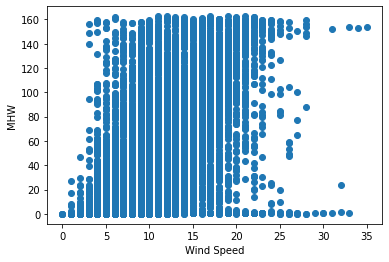

In [71]:
# Visually inspect the data with With Speed and MHW
plt.scatter(hackberryWindMWH.WindSpeed_mph, hackberryWindMWH.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MHW')
plt.show()

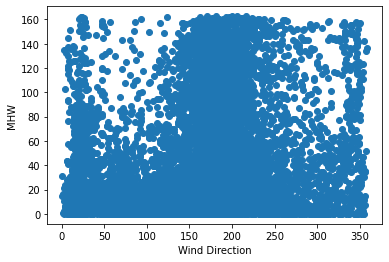

In [72]:
# Visually inspect the data with With Direction and MHW
plt.scatter(hackberryWindMWH.WindDirection_degrees, hackberryWindMWH.MWH)
plt.xlabel('Wind Direction')
plt.ylabel('MHW')
plt.show()

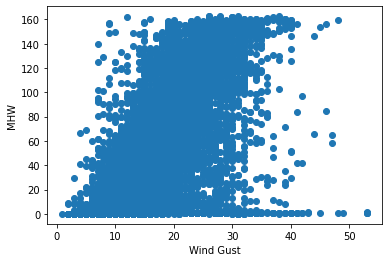

In [73]:
# Visually inspect the data with With Gust and MHW
plt.scatter(hackberryWindMWH.WindGust_mph, hackberryWindMWH.MWH)
plt.xlabel('Wind Gust')
plt.ylabel('MHW')
plt.show()

In [74]:
# Creating dataframe with wind direction blowing east
windEast = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'E']

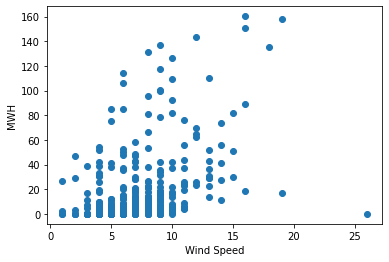

In [75]:
# Visually inspect the data of wind speed to MWH for winds blowing east.
plt.scatter(windEast.WindSpeed_mph, windEast.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

## Inspect Data based on Wind Direction

In [76]:
# Creating dataframe with wind direction blowing West
windWest = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'W']

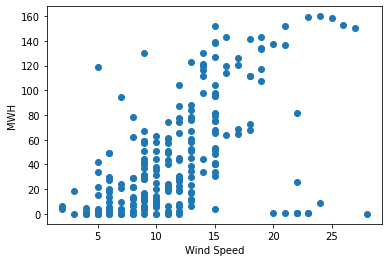

In [77]:
# Visually inspect the data of wind speed to MWH for winds blowing West.
plt.scatter(windWest.WindSpeed_mph, windWest.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [78]:
# Creating dataframe with wind direction blowing South
windSouth = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'S']

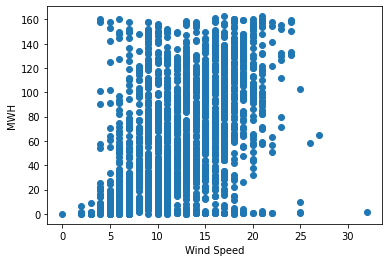

In [79]:
# Visually inspect the data of wind speed to MWH for winds blowing South.
plt.scatter(windSouth.WindSpeed_mph, windSouth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [80]:
# Creating dataframe with wind direction blowing North
windNorth = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'N']

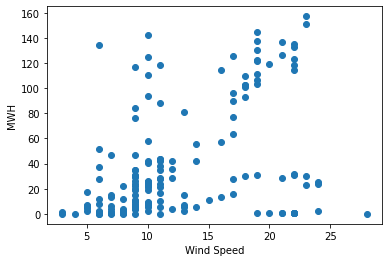

In [81]:
# Visually inspect the data of wind speed to MWH for winds blowing North.
plt.scatter(windNorth.WindSpeed_mph, windNorth.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [82]:
# Creating dataframe with wind direction blowing NE
windNE = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NE']

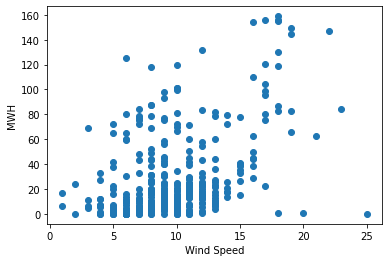

In [83]:
# Visually inspect the data of wind speed to MWH for winds blowing NE.
plt.scatter(windNE.WindSpeed_mph, windNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [84]:
# Creating dataframe with wind direction blowing NW
windNW = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NW']

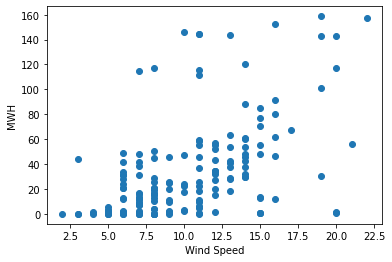

In [85]:
# Visually inspect the data of wind speed to MWH for winds blowing NW.
plt.scatter(windNW.WindSpeed_mph, windNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [86]:
# Creating dataframe with wind direction blowing NNE
windNNE = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NNE']

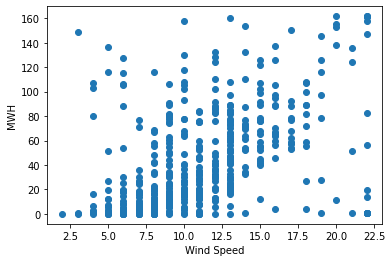

In [87]:
# Visually inspect the data of wind speed to MWH for winds blowing NNE.
plt.scatter(windNNE.WindSpeed_mph, windNNE.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()

In [88]:
# Creating dataframe with wind direction blowing NNW
windNNW = hackberryWindMWH[hackberryWindMWH.WindDirection_compass == 'NNW']

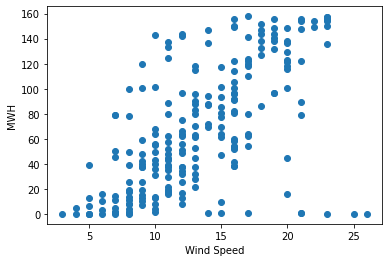

In [89]:
# Visually inspect the data of wind speed to MWH for winds blowing NNW.
plt.scatter(windNNW.WindSpeed_mph, windNNW.MWH)
plt.xlabel('Wind Speed')
plt.ylabel('MWH')
plt.show()